<a href="https://colab.research.google.com/github/ahmetcangunay/spotify_data_analysis_using_python/blob/main/Spotify_Data_Analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 246 kB 9.1 MB/s 
     |████████████████████████████████| 139 kB 54.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [5]:
CLIENT_ID = "9d34b8069d904f5ba4f61acae38b51bd"
CLIENT_SECRET = "ac6e506431b4432b91c8a8b3a9e4f955"

In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [7]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []

for i in range(0, 1000, 50):
  
  track_results = sp.search(q='year:2021', type='track', limit=50, offset=i)
  
  for i, t in enumerate(track_results['tracks']['items']):
    
    artist_name.append(t['artists'][0]['name'])
    artist_id.append(t['artists'][0]['id'])
    track_name.append(t['name'])
    track_id.append(t['id'])
    track_popularity.append(t['popularity'])

In [8]:
import numpy as np

In [9]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
track_df.index = np.arange(1, len(track_df) + 1)
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
1,Nicky Youre,Sunroof,4h4QlmocP3IuwYEj2j14p8,91,7qmpXeNz2ojlMl2EEfkeLs
2,Dj Biffen,Merry Christmas and Happy New Year 2021 - Radi...,7h7yPyss4MIBVPXVeF83vg,19,7K54lZmkO9dwqe22N27ftb
3,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,82,4oUHIQIBe0LHzYfvXNW4QM
4,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,61,4qmHkMxr6pTWh5Zo74odpH
5,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,85,3TVXtAsR1Inumwj472S9r4


In [10]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [11]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
1,Nicky Youre,Sunroof,4h4QlmocP3IuwYEj2j14p8,91,7qmpXeNz2ojlMl2EEfkeLs,73,[],47006
2,Dj Biffen,Merry Christmas and Happy New Year 2021 - Radi...,7h7yPyss4MIBVPXVeF83vg,19,7K54lZmkO9dwqe22N27ftb,13,[],26
3,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,82,4oUHIQIBe0LHzYfvXNW4QM,84,[contemporary country],3775053
4,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,61,4qmHkMxr6pTWh5Zo74odpH,54,"[art rock, folk rock, mellow gold, new wave po...",235579
5,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,85,3TVXtAsR1Inumwj472S9r4,95,"[canadian hip hop, canadian pop, hip hop, rap,...",66049926


In [12]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.768,0.714,10,-5.110,1,0.0401,0.35200,0,0.1500,0.842,131.443,audio_features,4h4QlmocP3IuwYEj2j14p8,spotify:track:4h4QlmocP3IuwYEj2j14p8,https://api.spotify.com/v1/tracks/4h4QlmocP3Iu...,https://api.spotify.com/v1/audio-analysis/4h4Q...,163026,4
1,0.887,0.633,8,-10.453,1,0.0660,0.06290,0.922,0.0637,0.849,130.023,audio_features,7h7yPyss4MIBVPXVeF83vg,spotify:track:7h7yPyss4MIBVPXVeF83vg,https://api.spotify.com/v1/tracks/7h7yPyss4MIB...,https://api.spotify.com/v1/audio-analysis/7h7y...,176363,4
2,0.505,0.657,11,-5.240,0,0.0318,0.37300,0.00107,0.1260,0.252,196.000,audio_features,3cBsEDNhFI9E82vPj3kvi3,spotify:track:3cBsEDNhFI9E82vPj3kvi3,https://api.spotify.com/v1/tracks/3cBsEDNhFI9E...,https://api.spotify.com/v1/audio-analysis/3cBs...,178520,3
3,0.645,0.809,11,-6.120,1,0.0385,0.00921,0.00108,0.1060,0.966,138.978,audio_features,3oyc1mIdCBGaU55wX7otqM,spotify:track:3oyc1mIdCBGaU55wX7otqM,https://api.spotify.com/v1/tracks/3oyc1mIdCBGa...,https://api.spotify.com/v1/audio-analysis/3oyc...,196680,4
4,0.849,0.424,5,-9.579,0,0.3240,0.06350,0,0.0834,0.153,145.887,audio_features,2BcMwX1MPV6ZHP4tUT9uq6,spotify:track:2BcMwX1MPV6ZHP4tUT9uq6,https://api.spotify.com/v1/tracks/2BcMwX1MPV6Z...,https://api.spotify.com/v1/audio-analysis/2BcM...,242966,4


In [13]:
cols_to_drop = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   loudness          1000 non-null   float64
 3   speechiness       1000

In [14]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 70.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      1000 non-null   float64 
 1   energy            1000 non-null   float64 
 2   loudness          1000 non-null   float64 
 3   speech

In [15]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)

,track_name,artist_name
1,Sunroof,Nicky Youre
7,Until I Found You,Stephen Sanchez
99,Where Are You Now,Lost Frequencies
9,Woman,Doja Cat
15,traitor,Olivia Rodrigo
43,Cold Heart - PNAU Remix,Elton John
63,Lo Siento BB:/ (with Bad Bunny & Julieta Venegas),Tainy
41,Shivers,Ed Sheeran
69,Bad Habits,Ed Sheeran
25,STAY (with Justin Bieber),The Kid LAROI


In [16]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
739,100996590,90,Ed Sheeran,"['pop', 'uk pop']"
855,67359051,88,Billie Eilish,"['art pop', 'electropop', 'pop']"
81,66049926,95,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
199,64252935,90,Justin Bieber,"['canadian pop', 'pop']"
913,58194874,89,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
549,56687628,93,Taylor Swift,['pop']
787,53328654,91,BTS,"['k-pop', 'k-pop boy group']"
83,53047349,100,Bad Bunny,"['latin', 'reggaeton', 'trap latino']"
181,48362374,93,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
129,42337967,86,Bruno Mars,"['dance pop', 'pop']"


In [17]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

progressive house       166
pop                     151
trance                  150
uplifting trance        126
progressive trance      114
edm                     109
rap                     100
pop dance                98
contemporary country     65
dance pop                62
rock                     56
hip hop                  55
art rock                 52
mellow gold              52
folk rock                49
trap                     48
new wave pop             48
power pop                48
pub rock                 48
roots rock               48
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

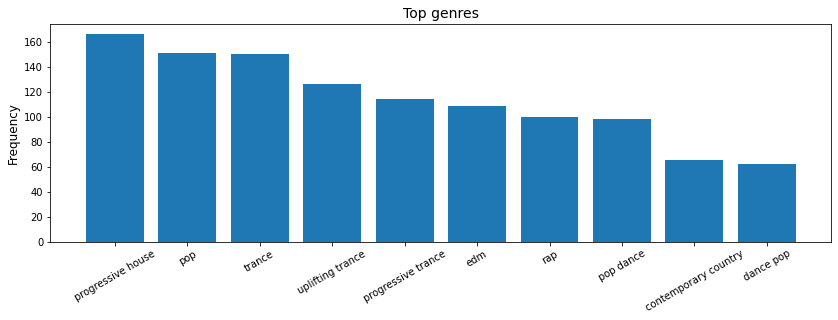

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)
plt.xticks(rotation=30)

In [19]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Armin van Buuren,progressive house
1,Ed Sheeran,pop
2,Tiësto,trance
3,Above & Beyond,uplifting trance
4,Above & Beyond,progressive trance
5,Marshmello,edm
6,Drake,rap
7,Marshmello,pop dance
8,Luke Combs,contemporary country
9,Bruno Mars,dance pop


In [20]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Rapture (Mixed),37,Kryder,progressive house
1,Where Are You Now,91,Lost Frequencies,pop
2,The Motto,88,Tiësto,trance
3,Stardust & Madness (Mixed),34,Ilan Bluestone,uplifting trance
4,Stardust & Madness (Mixed),34,Ilan Bluestone,progressive trance
5,Where Are You Now,91,Lost Frequencies,edm
6,Knife Talk (with 21 Savage ft. Project Pat),85,Drake,rap
7,Where Are You Now,91,Lost Frequencies,pop dance
8,Wasted On You,82,Morgan Wallen,contemporary country
9,Woman,90,Doja Cat,dance pop


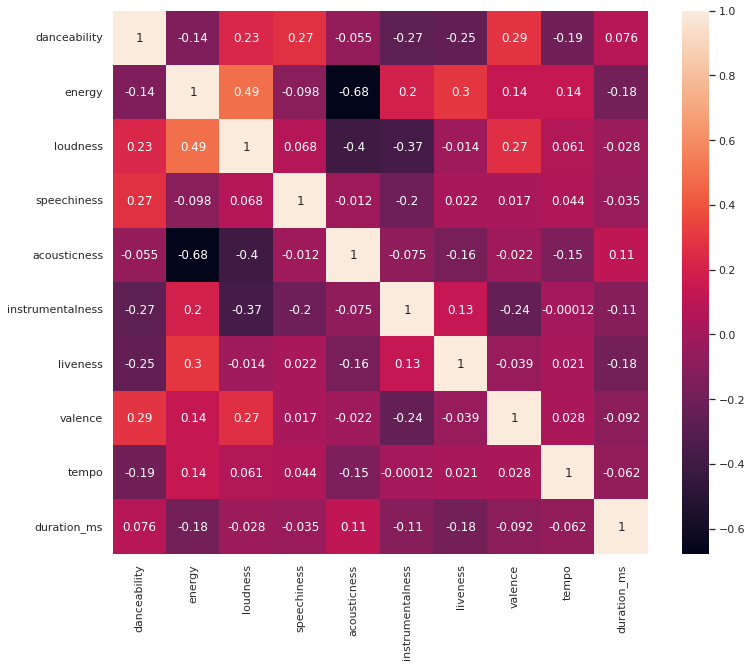

In [21]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

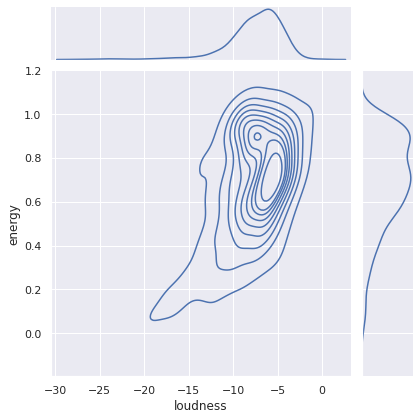

In [22]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")

In [25]:
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)
for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)
top_100_feat = top_100_feat[feat_cols]

from sklearn import preprocessing
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
print(mean_vals)

import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

   danceability    energy  speechiness  acousticness  instrumentalness  \
0      0.673320  0.659920     0.085202      0.233241          0.019141   
1      0.604239  0.690023     0.095325      0.196312          0.201115   

   liveness   valence  
0  0.166188  0.517137  
1  0.227335  0.483830  


In [29]:
rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=50)
for idx, track in enumerate(rec['tracks']):
  print(idx+1, track['artists'][0]['name'], track['name'])

1 Alan Walker Alone, Pt. II
2 Stellar Faith In Me
3 Fetty Wap 679 (feat. Remy Boyz)
4 The 1975 Girls
5 Young Thug Relationship (feat. Future)
6 Elton John Your Song
7 Fall Out Boy Centuries
8 Bee Gees Night Fever - From "Saturday Night Fever" Soundtrack
9 Crowded House Don't Dream It's Over
10 Samuel Kim Enemy - Epic Version (from Arcane League of Legends)
11 Jonas Blue Rise
12 Bea Miller Playground (from the series Arcane League of Legends)
13 Confetti Dear God
14 Yuna Crush
15 Lionel Richie Say You, Say Me
16 Drake Nonstop
17 Miley Cyrus Malibu
18 Jack Ü Where Are Ü Now (with Justin Bieber)
19 David Guetta Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afrojack) - DJ LBR Remix
20 Alan Walker World We Used To Know
21 J Balvin Mi Gente
22 Chris Brown Party (feat. Usher & Gucci Mane)
23 ZAYN Let Me
24 Electric Light Orchestra Last Train to London
25 Huey Lewis & The News Stuck With You
26 Trey Songz Slow Motion
27 NEFFEX Are You Ok?
28 Alan Walker Lily
29 Jax Jones You Don't Know Me
30 Chica